## Recursion 2

### Divide and Conquer
* A divide-and-conquer algorithm works by recursively breaking the problem down into two or more subproblems of the same or related type, until these subproblems become simple enough to be solved directly. Then one combines the results of subproblems to form the final solution.
* Another subtle difference that tells a divide-and-conquer algorithm apart from other recursive algorithms is that we break the problem down into two or more subproblems in the divide-and-conquer algorithm, rather than a single smaller subproblem. The latter recursive algorithm sometimes is called decrease and conquer instead, such as Binary Search.
* There are in general three steps that one can follow in order to solve the problem in a divide-and-conquer manner.
  1. Divide. Divide the problem S into a set of subproblems: {S1, S2,...Sn} where n≥2, i.e. there are usually more than one subproblem.
  2. Conquer. Solve each subproblem recursively.
  3. Combine. Combine the results of each subproblem.

#### Leetcode 912. Sort an Array 
* Merge sortAlgorithm
  + we divide the list from the mid into two parts
  + in each part, we further divide until each sublist is either empty or has a single element
  + we then merge them by comparing the values
  + since the splitted sublists will always be together, to save space, we just need another tmp list to save the intermediate results
  + we only need start, mid and end to merge two lists where each sublist contains elements between start and mid, and mid to end indices
  + in merge\_sort(start, end)
    + split the elements to start -> mid, and mid+1-> end
    + call merge\_sort(start, mid), and merge\_sort(mid+1, end)
    + call merge(start, mid, end) since we know start -> mid and mid+1 -> end are both sorted
```python
    class Solution:
        def sortArray(self, nums: List[int]) -> List[int]:
            temp_arr = [0] * len(nums)

            # Function to merge two sub-arrays in sorted order.
            def merge(left: int, mid: int, right: int):
                # Calculate the start and sizes of two halves.
                start1 = left
                start2 = mid + 1
                n1 = mid - left + 1
                n2 = right - mid

                # Copy elements of both halves into a temporary array.
                for i in range(n1):
                    temp_arr[start1 + i] = nums[start1 + i]
                for i in range(n2):
                    temp_arr[start2 + i] = nums[start2 + i]

                # Merge the sub-arrays 'in tempArray' back into the original array 'arr' in sorted order.
                i, j, k = 0, 0, left
                while i < n1 and j < n2:
                    if temp_arr[start1 + i] <= temp_arr[start2 + j]:
                        nums[k] = temp_arr[start1 + i]
                        i += 1
                    else:
                        nums[k] = temp_arr[start2 + j]
                        j += 1
                    k += 1

                # Copy remaining elements
                while i < n1:
                    nums[k] = temp_arr[start1 + i]
                    i += 1
                    k += 1
                while j < n2:
                    nums[k] = temp_arr[start2 + j]
                    j += 1
                    k += 1

            # Recursive function to sort an array using merge sort
            def merge_sort(left: int, right: int):
                if left >= right:
                    return
                mid = (left + right) // 2
                # Sort first and second halves recursively.
                merge_sort(left, mid)
                merge_sort(mid + 1, right)
                # Merge the sorted halves.
                merge(left, mid, right)

            merge_sort(0, len(nums) - 1)
            return nums
```    

#### Leetcode 98. Validate Binary Search Tree
* Overview
  + Given the root of a binary tree, determine if it is a valid binary search tree (BST).
  + A valid BST is defined as follows:
    + The left subtree of a node contains only nodes with keys less than the node's key.
    + The right subtree of a node contains only nodes with keys greater than the node's key.
    + Both the left and right subtrees must also be binary search trees.
* Algorithm
  + if we want to apply divide and conquer, it is easier to use bottom up, considering that the combine step needs to collect all the results of the conquer step
  + Here, we define a range within which the node value should be. otherwise, we return False
  + then we need to make sure its left and right child nodes are valid, too.
    + if the child node is None, child node returns True 
    + for left child node, we set high = min(node.val, high), since left child should < node.val
    + for right child, we set low = max(node.val, low), since right node should > node.val
    + return left recursion and right recursion results (combine step)

In [1]:
from typing import List, Optional
# Definition for a binary tree node.

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        if root is None:
            return True
        
        def traverse(node: TreeNode, low: int, high: int) -> bool:
            if node is None:
                return True
            
            if node.val <= low or node.val >= high:
                return False
            
            # divide, conquer and combine all together
            return traverse(node.left, low, min(high, node.val)) and traverse(node.right, max(low, node.val), high)
        
        
        return traverse(root, float("-inf"), float("inf"))  
            

#### 240. Search a 2D Matrix II
* Overview
  + Write an efficient algorithm that searches for a value target in an m x n integer matrix matrix. This matrix has the following properties:
    + Integers in each row are sorted in ascending from left to right.
    + Integers in each column are sorted in ascending from top to bottom.
* Algorithm
  + we start from the righ most position of the first row
  + for each position explored, if the target == cell value, return True
  + if cell value > target, go left and we know all the values in right down area is not possible
  + if cell value < target, we go down, and we know all the values in up left area is not possible
  + we only need to consider the left and down region
  + if we either row or column indices are out of the matrix, return False

In [2]:
from typing import List, Optional
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        if not matrix or not matrix[0]:
            return False
        
        m, n = len(matrix), len(matrix[0])
        
        i, j = 0, n-1
        
        while i < m and j > -1:
            if matrix[i][j] == target:
                return True
            # if the current value > target, go left
            if matrix[i][j] > target:
                j -= 1
            # else, current value < target, go down
            else:
                i += 1
        return False        

#### Quick sort
* time complexity
  + O(NlogN) on average, and O(N^2) worst case (each time split only one element out)
* space complexity
  + O(1)

In [3]:
from typing import List
def quicksort(lst):
    """
    Sorts an array in the ascending order in O(n log n) time
    :param nums: a list of numbers
    :return: the sorted list
    """
    n = len(lst)
    qsort(lst, 0, n - 1)

def qsort(lst, lo, hi):
    """
    Helper
    :param lst: the list to sort
    :param lo:  the index of the first element in the list
    :param hi:  the index of the last element in the list
    :return: the sorted list
    """
    if lo < hi:
        p = partition(lst, lo, hi)
        qsort(lst, lo, p - 1)
        qsort(lst, p + 1, hi)

def partition(lst, lo, hi):
    """
    Picks the last element hi as a pivot
     and returns the index of pivot value in the sorted array
    """
    pivot = lst[hi]
    i = lo
    for j in range(lo, hi):
        if lst[j] < pivot:
            lst[i], lst[j] = lst[j], lst[i]
            i += 1
    lst[i], lst[hi] = lst[hi], lst[i]
    return i

#### Master Theorem
* also known as Master Method, provides asymptotic analysis (i.e. the time complexity) for many of the recursion algorithms that follow the pattern of divide-and-conquer. 
* If we define the time complexity of the above recursion algorithm as T(n), then we can express it as follows: T(n)=a⋅T(n/b) + f(n)
  + f(n) is the time complexity of the divide and combine steps, which can be further represented as O(n^d) and d >= 0
  + a is the number of times we cursively call the sub-problem
  + T(n/b) is the time complexity of the sub-problem where the size is n/b by dividing an n-sized problem into b parts, and each part has a size of n/b
* if a > b^d, or d < logb(a), T(n) = O(n^logb(a))
  + dfs for binary tree traversal
    + we divide the problem to two sub-problems (left and right children), b = 2
    + we call each sub-problem, so a = 2
    + f(n) = O(1), we don't need to divide the children and we just collect the results, so d = 0
    + T(n) = O(N) log2(2) = 1    
* if a == b^d or d == logb(a), T(n) = O(n^logb(a)logn)
  + binary search
    + we divide the problem into two parts, b = 2
    + a = 1, we only work on one of the two parts
    + f(n) = O(1), so d = 0
    + T(n) = O(logN)
  + merge sort
    + the array is split into 2 parts, b = 2
    + each part is processed, a = 2
    + combine is O(N) to merge sorted list, d = 1
    + T(n) = O(NlogN)
* if a < b^d, or d > logb(a), then T(n) = O(n^d)
  + quickselect to select the Kth largest/smallest element from a list
  + we divide the list to two parts, b = 2
  + we only focus on one part, a = 1
  + f(n) = O(N), we take O(N) to partition the list
  + T(n) = O(N)  

### Backtracking
* Overview
  + Backtracking is a general algorithm for finding all (or some) solutions to some computational problems (notably Constraint satisfaction problems or CSPs), which incrementally builds candidates to the solution and abandons a candidate ("backtracks") as soon as it determines that the candidate cannot lead to a valid solution
  + Conceptually, one can imagine the procedure of backtracking as the tree traversal.
    + Starting from the root node, one sets out to search for solutions that are located at the leaf nodes.
    + Each intermediate node represents a partial candidate solution that could potentially lead us to a final valid solution. 
    + At each node, we would fan out to move one step further to the final solution, i.e. we iterate the child nodes of the current node. Once we can determine if a certain node cannot possibly lead to a valid solution, we abandon the current node and backtrack to its parent node to explore other possibilities.
    + It is due to this backtracking behaviour, the backtracking algorithms are often much faster than the brute-force search algorithm, since it eliminates many unnecessary exploration. 

#### Leetcode 52. N-Queens II
* Overview
  + The n-queens puzzle is the problem of placing n queens on an n x n chessboard such that no two queens attack each other.
  + Given an integer n, return the number of distinct solutions to the n-queens puzzle.
* Algorithm
  + This is a backtrack problem. The points are the following:
     + 1. we need to count how many solutions we have to put N queens to a N times N square
     + 2. to do that, we traverse all the rows, if we can put one queen on each row, then we get a solution. This is because we can put at most one queen in each row. If we want to put N queens on the board, then each row will have to have exact one queen
     + 3. so the problem is converted to if we can find a solution to put one queen in each row. We need to find the number of solutions.
     + 4. The base case is that whenever we interate row to N, we have one solution, so we just return 1.
     + 5. Once we put a queen, we will need to add the restriction conditions to the next recursive call, namely, the cols, diags, and antidiags set. For the next recursive calll, we only need to exclude the positions that have these 3 restrictions.
     + 6. Once the dfs resutls starting from a specific position is returned and counted to rs,we remove the queen by removing its restrictions. 
     + 7. If there is no solution going to the end, we will return rs as zero
  + The restrictions are as the following:    
    + col: column index
    + antidiags: column index + row index = constant
    + diags: column index - row index = constant 
  + the three restrictions is initialized as empty sets, and are added during backtracking 
* Time complexity: O(N!), where N is the number of queens (which is the same as the width and height of the board).
  + Unlike the brute force approach, we place a queen only on squares that aren't attacked. 
    + For the first queen, we have N options. 
    + For the next queen, we won't attempt to place it in the same column as the first queen, and there must be at least one square attacked diagonally by the first queen as well. Thus, the maximum number of squares we can consider for the second queen is N−2. 
    + For the third queen, we won't attempt to place it in 2 columns already occupied by the first 2 queens, and there must be at least two squares attacked diagonally from the first 2 queens. Thus, the maximum number of squares we can consider for the third queen is N−4. 
    + This pattern continues, giving an approximate time complexity of N! at the end.

* Space complexity: O(N), where N is the number of queens (which is the same as the width and height of the board).
  + Extra memory used includes the 3 sets used to store board state, as well as the recursion call stack. All of this scales linearly with the number of queens.  
    

In [ ]:
class Solution:
    def totalNQueens(self, n: int) -> int:
        if n == 1:
            return n
        
        # initialize sets to keep track of restrictions for column index
        # diagonal and anti-diagonal restrictions
        cols, diags, antidiags = set(), set(), set()
        
        def dfs(row: int) -> int:
            # if row index is n, meaning n queens have been positioned
            # therefore, one solution is found, return 1
            if row == n:
                return 1
            
            rs = 0
            
            for col in range(n):
                diag = col - row
                antidiag = col + row
                
                # if the current col position is possible, add the restrictions
                # and recursively call the next row
                if col not in cols and diag not in diags and antidiag not in antidiags:                    
                    cols.add(col)
                    diags.add(diag)
                    antidiags.add(antidiag)
                    rs += dfs(row+1)
                    cols.remove(col)
                    diags.remove(diag)
                    antidiags.remove(antidiag)
            return rs   
        
        return dfs(0)  
        

#### Template

* The pseudocode shown below
* Overall, the enumeration of candidates is done in two levels: 1). at the first level, the function is implemented as recursion. At each occurrence of recursion, the function is one step further to the final solution.  2). at the second level, within the recursion, we have an iteration that allows us to explore all the candidates that have the same distance to the final solution.
* The backtracking should happen at the level of the iteration within the recursion. 
* Unlike brute-force search, in backtracking algorithms we are often able to determine if a partial solution candidate is worth exploring further (i.e. is_valid(next_candidate)), which allows us to prune the search zones. This is also known as the constraint, e.g. the attacking zone of queen in N-queen game. 
* There are two symmetric functions that allow us to mark the decision (place(candidate)) and revert the decision (remove(candidate)).  

In [ ]:
def backtrack(candidate):
    if find_solution(candidate):
        output(candidate)
        return
    
    # iterate all possible candidates.
    for next_candidate in list_of_candidates:
        if is_valid(next_candidate):
            # try this partial candidate solution
            place(next_candidate)
            # given the candidate, explore further.
            backtrack(next_candidate)
            # backtrack
            remove(next_candidate)

#### Leetcode 489. Robot Room Cleaner
* Overview
  + You are controlling a robot that is located somewhere in a room. The room is modeled as an m x n binary grid where 0 represents a wall and 1 represents an empty slot.
  + The robot starts at an unknown location in the room that is guaranteed to be empty, and you do not have access to the grid, but you can move the robot using the given API Robot.
  + You are tasked to use the robot to clean the entire room (i.e., clean every empty cell in the room). The robot with the four given APIs can move forward, turn left, or turn right. Each turn is 90 degrees.
  + When the robot tries to move into a wall cell, its bumper sensor detects the obstacle, and it stays on the current cell.
  + Design an algorithm to clean the entire room using the following APIs:

```java
    interface Robot {
      // returns true if next cell is open and robot moves into the cell.
      // returns false if next cell is obstacle and robot stays on the current cell.
      boolean move();

      // Robot will stay on the same cell after calling turnLeft/turnRight.
      // Each turn will be 90 degrees.
      void turnLeft();
      void turnRight();

      // Clean the current cell.
      void clean();
    }
```

* General Algorithm
  + The challenge is to track the positions and directions of robots during exploration
    + we just use turn right function to exploare the space
    + using backtrack for each recursive call, so that      
      + when all four dirctions are exhuasted, then recursive call returns
        + we first go back, and then turn right to explore
    + It is important that the four directions are in order of up, right, down and left
      + by doing this, we first explore in a clock-wise way to clean new cells, then anti-clock wise
      + once all new cells in a region is cleaned, then turn right, this will lead to go back
      + during the moving back, check the neighbours in up, right, down, left order to explore new cells. 
      + two situations
        + one is that when all the four directions in for loop finish, will recursive back
        + the other is when one direction is exhausted, it first go back (turn right twice and move, and then turn right twice)
        + in for loop, the direction is defined by d (current direction + new_d in clock wise direction, this corresponds to turn right after each iteration inside the for loop. 
        + In either the case when the current direction is not avaialbe (move() returns False), or the current position has been expored with its neighbours and goback, we turn right to explore the next position AT THE SAME LEVEL
        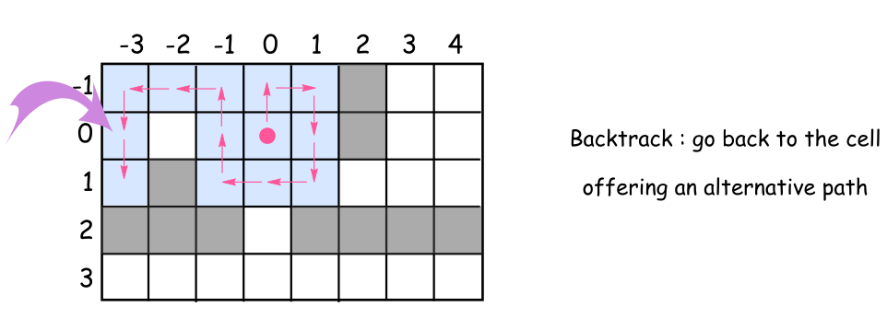
* Time complexity
  + O(N-M) where N and M are the number of cells and the number of obstacles, respectively
    + for each empty cells, we explore 4 directios, so it will be 4(N-M), which has O(N-M)
* Space complexity
  + O(N-M). we store all the empty cells that are cleaned
  
* Implementation notes
  + the row and column indices correspond to y and x coordinates. 
  + define a diction array to define the up, right, down and left
  + each time a direction is finished, the next dirction is (d+1) % 4
  + explore(i, j, d) is called only for cell(i, j) is empty and not been clened. Therefore, we will first add (i, j) into the visited set, and then explore its four neighbors
    + directions are explored by adding 0, 1, 2, 3 to the current d mod by 4, so basically, the direction along the original direction will be tried, and then the next clock-wise direction
    + it is important to pass the direction to explore() function for its recursive chain so that depending on its direction, the following recusions will continue to explore in clock-wise directions
    + once a recusion call is returned, use go_back() function to go back to (i, j) cell with its original direction
  + in both case that a new coordination (x, y) is valid or not, we need to use robot.turnRight() to change the direction to the next one consistent to the move direction defined in moves(new_d) statement in for loop  
  + different from typical backtracking problem, we don't remove the tried cells from the visited set 

In [4]:
class Robot:
    def move(self):
       """
       Returns true if the cell in front is open and robot moves into the cell.
       Returns false if the cell in front is blocked and robot stays in the current cell.
       :rtype bool
       """

    def turnLeft(self):
       """
       Robot will stay in the same cell after calling turnLeft/turnRight.
       Each turn will be 90 degrees.
       :rtype void
       """

    def turnRight(self):
       """
       Robot will stay in the same cell after calling turnLeft/turnRight.
       Each turn will be 90 degrees.
       :rtype void
       """

    def clean(self):
       """
       Clean the current cell.
       :rtype void
       """
        
class Solution:
    def cleanRoom(self, robot):
        """
        :type robot: Robot
        :rtype: None
        """
        
        # initialize sets to store cleaned cells
        cleaned = set()
        
        # define the four direction array
        # Note that row defined y/vertical direction and
        # column defines x/horizontal direction
        moves = [[-1, 0], [0, 1], [1, 0], [0, -1]]
        
        # move robot out of the current position
        # and turn its direction as the original
        # before moving and cleaning the current cell
        def go_back():
            robot.turnRight()
            robot.turnRight()
            robot.move()
            robot.turnRight()
            robot.turnRight()
            
        def explore(i: int, j: int, d: int=0) -> None:
            cleaned.add((i, j))
            robot.clean()
                        
            # don't use i as the variable name in for loop!
            # i will shunt the input i value
            for index in range(4):
                new_d = (d + index) % 4
                move = moves[new_d]
                x, y = i + move[0], j + move[1]
                if (x, y) not in cleaned and robot.move():
                    
                    # start the new recursion chain
                    explore(x, y, new_d)
                    
                    # adjust to its original moving direction
                    go_back()
                
                # turn the direction right to be consistent 
                # to the new_d for next iteration defined in 
                # for loop
                robot.turnRight()
                
        explore(0, 0)     
            

#### Leetcode 37. Sudoku Solver
* Overview
  + Write a program to solve a Sudoku puzzle by filling the empty cells.
  + A sudoku solution must satisfy all of the following rules:
    + Each of the digits 1-9 must occur exactly once in each row.
    + Each of the digits 1-9 must occur exactly once in each column.
    + Each of the digits 1-9 must occur exactly once in each of the 9 3x3 sub-boxes of the grid.
    + The '.' character indicates empty cells.
* Algorithm (backtracking)
  + use defaultDict with set to store cols, rows, and cubes
  + cube is defined as i//3 X 3 +j//3 to represent the id of cubes consisting of 9 elements ordered from the top left -> top right -> down to left -> move to right until to the bottom right
  + it is important to not only reset cols, rows, and cubes dictionary, but also reset board\[i\]\[j\]="." when board\[i\]\[j+1\] is not True
  + traverse the board first to feed in cols, rows and cubes defaultdicts
  + in backtrack(i, j), if board(i)(j) != ".", return backtrack(i, j+1)
  + otherwise, check all the possible values that comply with cols, rows and cubes constraints in a for loop, and recursively call backtrack(i, j+1), which, if returns true, return true
    + if backtrack(i, j+1) returns False, reset all dictionaries, and the value of board(i)(j) to "."
  + return False after for loop  

In [6]:
from typing import List
from collections import defaultdict
class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        cols, rows, cubes = defaultdict(set), defaultdict(set), defaultdict(set)
        
        def get_cube_id(row: int, col: int) -> int:
            return (row // 3) * 3 + col // 3
        
        for i in range(9):
            for j in range(9):               
                if board[i][j] != ".":
                    cube_id = get_cube_id(i, j)
                    value = board[i][j]
                    rows[i].add(value)
                    cols[j].add(value)
                    cubes[cube_id].add(value)
                    
        def backtrack(row: int, col: int) -> bool:
            # all the cells have been filled, get one solution
            if row == 8 and col == 9:
                return True
            
            # move to the next row if col is 9
            if col == 9:
                row += 1
                col = 0
                
            if board[row][col] != ".":
                return backtrack(row, col+1)
            
            cube_id = get_cube_id(row, col)
            
            # traverse all the possible values
            for val in range(1, 10):
                val = str(val)
                # if find one valid candidate
                if val not in cols[col] and val not in rows[row] and val not in cubes[cube_id]:
                    # set constraints
                    cols[col].add(val)
                    rows[row].add(val)
                    cubes[cube_id].add(val)
                    board[row][col] = val
                    
                    # recusive call. If success, return True
                    if backtrack(row, col+1):
                        return True
                    cols[col].remove(val)
                    rows[row].remove(val)
                    cubes[cube_id].remove(val)
                    board[row][col] = "."
            # return False
            return False
        
        return backtrack(0, 0)               

#### Leetcode 77. Combinations
* Overview
  + Given two integers n and k, return all possible combinations of k numbers chosen from the range \[1, n\].
  + You may return the answer in any order.
* Algorithm
  + backtracking starting from 1
  + use the backtracing template with backtrack(start, inter_rs, k, rs)
  + use for loop to traverse i from start to n-k+2 (or n+1 for simplicity)
    + Why use n+2-k in item 2? because at this step, we still need to add k numbers to inter_rs, and to find at least k numbers after the current i, the largest starting index should be n+2-k. For example, if we need to find k=3 numbers, and the end number is n=5, then the biggest starting index is 3 since 3,4,5 are the three numbers. so the right side of the range will be n+2-k=5+2-3=4. Remember, the right side of range(idx, 4) is 3.
  + recursively call backtrack(i+1, inter_rs=\[i\], k-1, rs)
  + base case if k==0, rs.append(inter_rs)
  + make sure that    
    + input start index is not directly written in inter\_rs, but the traverse variable i is added in inter\_rs
    + i also decide the start index for the next recusion call 
* time complexity
  + O(KCnK) where there are CnK combinations and each combination needs k operations to add to list
* space complexity
  + O(KCnK) the same as time complexity: CnK combinations and each combination occupies K elements

In [8]:
from typing import List
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        if n < k:
            return []
        
        if k == n:
            return [list(range(1, n+1))]
        
        
        def backtrack(start: int, k: int, tmp_rs: List[int]) -> None:
            
            if k == 0:
                rs.append(tmp_rs)
                return
            
            for i in range(start, n-k+2):
                backtrack(i+1, k-1, tmp_rs+[i])
                
        rs = []
        backtrack(1, k, [])
            
        return rs     

#### Leetcode 100. Same Tree
* Overview
  + Given the roots of two binary trees p and q, write a function to check if they are the same or not.
  + Two binary trees are considered the same if they are structurally identical, and the nodes have the same value.
* Algorithm
  + recursive
    + compare the two trees, and then return their left children are same and right children are the same
  + iterative
    + use a deque. First compare the two nodes popleft from queue, then push both left children next to each other, and right children next to each other to compare by the same logic
 * Time complexity
   + O(N)
 * Space complexity
   + O(N)

In [10]:
from typing import List, Optional

# iterative implementation
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        if p is None and q is None:
            return True
        
        if p is None or q is None:
            return False
        
        if p.val != q.val:
            return False
        
        return self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right)

# recursive implementation
class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        
        def compare_trees(p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:            
            if p is None and q is None:
                return True

            if p is None or q is None:
                return False
            
            if p.val != q.val:
                return False
            
            return True
        
        que = deque([(p, q)])
        
        while que:
            p, q = que.popleft()
            if not compare_trees(p, q):
                return False
            
            if p:
                que.append((p.left, q.left))
                que.append((p.right, q.right))
                
        return True          
            

#### Leetcode 22. Generate Parentheses
* Overview
  + Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.
* Algorithm  
  + recursive backtrack
    + use backtrack template backtrack(left, right, inter_rs) where left and right are the number of left and right parathesis, respectively
    + if right == n, we have a valid answer, apppend inter_rs to rs
      + this is because we always balance the right one with left one.
      + we ONLY balance the right parathesis when left overnumbers the right
        + we never add a right parathesis without a matching left one
    + if left < n, add a left side parathesis and update left
  + iterative backtrack
    + same logic as recursive algorithm, just use deque to store iter_rs and update expression and the corresponding left and right numbers
    + append valid expressions to rs lsit and return rs
* time and space complexity
  + The number of valid answers is the n-th Catalan number 
   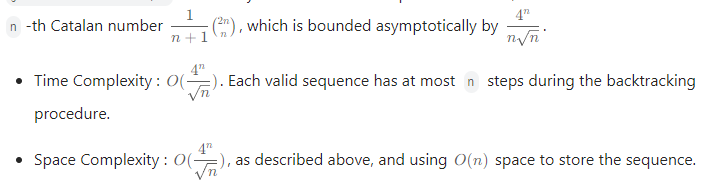


In [11]:
# iterative implementation

from typing import List
from collections import deque
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        if n == 0:
            return []
        
        q = deque([("", 0, 0)])
        rs = []
        
        while q:
            exp, left, right = q.popleft()
            
            if right == n:
                rs.append(exp)
                
            else:
                if right < left:                    
                    q.append((exp+")", left, right+1))
                if left < n:
                    q.append((exp+"(", left+1, right))
                    
        return rs             
            
 # recursive implementation
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        if n == 0:
            return []
        
        rs = []
        
        def backtrack(left: int, right: int, inter_rs: str) -> None:
            if right == n:
                rs.append(inter_rs)
                return
            
            if right < left:
                backtrack(left, right+1, inter_rs + ")")
                
            if left < n:
                backtrack(left+1, right, inter_rs + "(")
                
        backtrack(0, 0, "")         
        
        return rs

#### Leetcode 426. Convert Binary Search Tree to Sorted Doubly Linked List
* Overview
  + Convert a Binary Search Tree to a sorted Circular Doubly-Linked List in place.
  + You can think of the left and right pointers as synonymous to the predecessor and successor pointers in a doubly-linked list. For a circular doubly linked list, the predecessor of the first element is the last element, and the successor of the last element is the first element.
  + We want to do the transformation in place. After the transformation, the left pointer of the tree node should point to its predecessor, and the right pointer should point to its successor. You should return the pointer to the smallest element of the linked list.
* Algorithm
  + using in-order traversal to get the sorted linked list
  + return None if current node is None
  + connect the left and right pointers during the traversal
  + mark the head of the list if the pre is None when traversing the current node
  + when traverse() returns, pre points to the tail of the list
  + connect head and tail (pre) by head.left = pre and pre.right = head
  + return head
* Time complexity and space complexity
  + O(N) to traverse each node with stack space for recursion 

In [12]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
"""

class Solution:
    def treeToDoublyList(self, root: 'Optional[Node]') -> 'Optional[Node]':
        if root is None:
            return None
        
        head, pre = None, None
        
        # traverse the BST using inorder traversal
        # the smallest node is identified if it doesn't have pre
        def traverse(node: Optional['Node']) -> Optional['Node']:
            nonlocal head, pre
            
            if node is None:
                return None
            
            traverse(node.left)
            
            # identify the smallest node (staring point of linked list)
            # if pre is None
            if pre is None:
                head = node                
            else:
                pre.right = node
                node.left = pre
            
            # set current node as pre
            pre = node
            
            traverse(node.right)
            
        traverse(root)
        
        # line the tail and head of the doubly linked list
        pre.right = head
        head.left = pre
        
        return head       

#### Leetcode 84. Largest Rectangle in Histogram
* Overview
  + Given an array of integers heights representing the histogram's bar height where the width of each bar is 1, return the area of the largest rectangle in the histogram.
* Algorithm (stack)
  + the idea is to maintain the non-decreasing sub sequence of the bars
  + the area a bar can cover is defined by its left and righ edges which are <= its height
  + if a bar i, is shorter than its previous bar i-1, then the previous non-decreasing sequence can form rectangles ending at index i-1 due to the non-decreasing property
    + the current bar is the right edge of the previous bar, and since the stack only store no decreasing sequence, the index stored before this previous bar is its left edge, so we can safely calculate the area that can be covered by the previous bar. 
    + if the current bar is still shorter or equal to the bar with its index stored in the stack, it is also the right edge of that bar, we pop it and calculate the area covered by that bar, with the curren top in stack as its left edge 
  + what we do is to keep poping up the previous bar and using its height and width (i-popped index -1)
  + we use the current index i minus the stack(-1) after popping up the previous bar and minus 1 to only count the number of bars in between excluding i and the popped bars for area calculation
    + however, we will stop popping up when the height in stack is lower than the current bar, since this will form rectangles when the curren bar is popped, which has a wider width
  + areas are calculated only when stack(-1) > -1, meaning that only when there is at least one bar in the stack. Otherwise, the area will not be calculated  

In [2]:
from typing import List
class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        if not heights:
            return 0
        
        stack = [-1]
        heights.append(0)
        
        rs = 0
        for i, h in enumerate(heights):
            # only calculate area when there is at least one bar
            # in the stack, and the bar' height is at least 
            # no shorter than the current bar
            while stack[-1] > -1 and heights[stack[-1]] >= h:
                height = heights[stack.pop()]
                rs = max(rs, height * (i-stack[-1]-1))
            stack.append(i)   
            
        return rs            

#### Leetcode 46. Permutations
* Overview
  + Given an array nums of distinct integers, return all the possible permutations. You can return the answer in any order.
* Algorithm
  + backtracking
  + set up visited set
  + define backtrack(inter\_rs : List\[int\])
    + if len(inter\_rs) == n, add inter\_rs to rs and return
    + traverse num in nums, if num not in visited, 
      + add num to visited, and call backtrack(inter\_rs+\[num\])
      + remove num from visited
  + backtrack(\[\])
  + return rs
* time complexity
  + O(Pn(m))
* space complexity
  + O(Pn(m))

In [14]:
from typing import List

class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        visited = set()
        
        n = len(nums)
        rs = []
        def backtrack(inter_rs: list[int]) -> None:
            if len(inter_rs) == n:
                rs.append(inter_rs)
                
            for num in nums:
                if num not in visited:
                    visited.add(num)
                    backtrack(inter_rs+[num])
                    visited.remove(num)
                    
        backtrack([]) 
        return rs
        

#### Leetcode 17. Letter Combinations of a Phone Number
* Overview
  + Given a string containing digits from 2-9 inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.
  + A mapping of digits to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.
* Algorithm
  + backtrack
  + traverse the index of digits, then traverse the possible letters and concatenate the results of indices
  + base case
    + when index == n, add inter rs to rs, and return
    + for letter in digit(index), recursive call backtrack(index +1, inter+letter)
* time complexity
  + O(N4^N) where N is the length of the digit
    + each position has mostly 4 possible letters, so we have 4^N combinations, and each combination requires N operations 
* space complexity
  + O(N) except for space for output. Each time, we process one string output, which requires N space
  


In [16]:
from typing import List
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        if not digits:
            return []
        d = {
            "2": ['a', 'b', 'c'],
            "3": ['d', 'e', 'f'],
            "4": ['g', 'h', 'i'],
            "5": ['j', 'k', 'l'],
            "6" : ['m','n', 'o'],
            "7": ['p', 'q', 'r', 's'],
            "8": ['t', 'u', 'v'],
            "9": ['w', 'x', 'y', 'z']
        }
        
        n = len(digits)
        rs = []
        
        def backtrack(index: int, inter_rs: str) -> None:
            if index == n:
                rs.append(inter_rs)
                return
            
            for l in d[digits[index]]:
                backtrack(index+1, inter_rs+l)
                
        backtrack(0, "")
        return rs
        

#### Leetcode 218. The Skyline Problem
* Overview
  + A city's skyline is the outer contour of the silhouette formed by all the buildings in that city when viewed from a distance. Given the locations and heights of all the buildings, return the skyline formed by these buildings collectively.

  + The geometric information of each building is given in the array buildings where buildings\[i\] = \[lefti, righti, heighti\]:
    + lefti is the x coordinate of the left edge of the ith building.
    + righti is the x coordinate of the right edge of the ith building.
    + heighti is the height of the ith building.
  + You may assume all buildings are perfect rectangles grounded on an absolutely flat surface at height 0.
  + The skyline should be represented as a list of "key points" sorted by their x-coordinate in the form \[\[x1,y1],[x2,y2\],...\]. Each key point is the left endpoint of some horizontal segment in the skyline except the last point in the list, which always has a y-coordinate 0 and is used to mark the skyline's termination where the rightmost building ends. Any ground between the leftmost and rightmost buildings should be part of the skyline's contour.
  + Note: There must be no consecutive horizontal lines of equal height in the output skyline. For instance, \[...,\[2 3\],\[4 5\],\[7 5\],\[11 5\],\[12 7\],...\] is not acceptable; the three lines of height 5 should be merged into one in the final output as such: \[...,\[2 3\],\[4 5\],\[12 7\],...\]
* Algorithm (Divide and conquer implementation)
  + This implementation is the same as merge sort. We recursively separate the build lists provided (for example, contains n builidings) to smaller list until we have one element in each sublist, where, the three parameters are converted to two edges, one with the \[start, heigh\], the other has \[end, 0\]. Here start and end refert to each buildings start and end indices on x dimesion.

  + Then we call merge function to merge the sublist using the same logic as merge sort. The basic idea is that we first compare the x dimension of the current element of left and right sublists, and define the current update x value as the smaller of the two. (if the two x are the same, we focus on right one), and then we find the current y as the maximum of the current left and right. If this max-y is different from the current y, then we update the current y and the profile. 

  + The key point is that due to the merge sort process, all the building input have been converted to edges. in the left or right sublist, unless the next element in the same sublist that changes the current left_y or right_y, these values are supposed to continue in the current comparision, therefore max_y is always the max between left_y and right_y, unless the next edge in the same sublist replace it. Therefore, we can safely assume that when updating the rs (this is a clean list each time when merge is called), the current x will either equals to the top element in result stack, or bigger. This is because we compare the x in the first step during the merge process, and there is no "history" records before the current merge function.
    + if previous x is from left, and the current x is from right x, its righ y value will be compared to the existing left y value. 
  + several points:
    + during the merge, whenever left and right don't have the same x value, use the smaller one and increament the corresponding pointer. Otherwise, needs to increament both pointers, and let the two y values to compete, and use the high one.
    + we initialize left\_y = right\_y = 0, which is smaller than any possible y values. This ensures that at the begining of the merge, the smaller of left\_x and right\_x will have its corresponding y value be selected as max\_y
    + then for the next iteration of comparison, the newly selected left\_y or right\_y will be compared to the 
    + we only need to update the result list when the current max_y is different from the the last element in the result, otherwise, we just keep the current value, sicne all the edge only recored the start coordination and the corresponding y value. Even if the current x is bigger than the last element in the result, we still don't need to update, until a later x in one of the sublist has a different y value, we update. This will guarantee to happen, since we know the last element of each sublist will have a y value of zero
    + need to remember the pattern for merge sort:
      a. the while loop only handles when both sublists are not completed
	  b. after the while loop, consider the remaining sublist. This MUST BE OUT OF WHILE LOOP
	  c. when return the results, this has to be OUT OF THE WHILE LOOP AND SECTION b.

In [ ]:
class Solution:
    def getSkyline(self, buildings: List[List[int]]) -> List[List[int]]:
       
        if len(buildings) == 1:
            start, end, height = buildings[0]
            return [[start, height], [end, 0]]
        
        n = len(buildings)
        mid = n // 2
        left = self.getSkyline(buildings[:mid])
        right = self.getSkyline(buildings[mid:])
        return self.merge(left, right)
    
    def merge(self, l1: List[List[int]], l2: List[List[int]]) -> List[List[int]]:
        if not l1 and not l2:
            return []
        
        if not l1:
            return l2
        
        if not l2:
            return l1
        
        # initialize left and right indices to be 0
        # and intitialize the y values for left and right
        # sublist as 0, which is smaller than any possible
        # y values. This will allow the initialization of
        # y values for the first iteration
        left, right, left_y, right_y = 0, 0, 0, 0
        
        # initialize x values for left, right sublists and
        # current as -1
        left_x = right_x = curr_x = -1
        n1, n2 = len(l1), len(l2)
        rs = []
        
        # if both sublists are not exhausted
        while left < n1 and right < n2:
            # get x values for left and right sublists
            left_x, right_x = l1[left][0], l2[right][0]
            
            # select the smaller of the left_x and right_x to move
            # forward for merging operation. For the 1st iteration, if
            # left_x or right_x is bigger, its y value will not be updated
            if left_x < right_x:
                curr_x = left_x
                left_y = l1[left][1]
                left += 1
            elif right_x < left_x:
                curr_x = right_x
                right_y = l2[right][1]
                right += 1
            else:
                curr_x = left_x                
                left_y = l1[left][1]
                right_y = l2[right][1]
                left += 1
                right += 1
            
            # comparison occurs between the updated left_y/right_y and the
            # remaining right_y/left_y
            max_y = max(left_y, right_y) 
            if not rs or max_y != rs[-1][1]:
                rs.append([curr_x, max_y])
                
        # update the rs out of while loop if l1 or l2 are not exhausted
        if left < n1:
            rs.extend(l1[left:])
        if right < n2:
            rs.extend(l2[right:])

        return rs     
